<a href="https://colab.research.google.com/github/MurrayAlexis/COLAB2/blob/main/5_29_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
ls '/content/drive/MyDrive/txt'

'Evenings with idries Shah.txt'   Kara_Kush.txt  'The Wat of the Sufi.txt'


In [6]:
import nltk
from nltk.corpus import PlaintextCorpusReader

#PlaintextCorpusReader
#讀取純文字檔案，並把它們當作語料庫（corpus）來分析
corpus_root = '/content/drive/MyDrive/txt' # 請改成自己的路徑 File Path
wordlists = PlaintextCorpusReader(corpus_root, '.*') # .* => find all files, .txt => only find txt files

books = wordlists.fileids() # 回傳檔名
print(books)

['Evenings with idries Shah.txt', 'Kara_Kush.txt', 'The Wat of the Sufi.txt']


In [ ]:
import nltk
nltk.download("popular")
nltk.download('all-corpora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

False

In [ ]:
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/My Drive/Colab Notebooks/TED' # 請改成自己的路徑
wordlists = PlaintextCorpusReader(corpus_root, '.*') # *: all .txt

books = wordlists.fileids()
print(books)

['2011pos Older people are happier.txt', '2012neg What doctors don_t know about the drugs they prescribe.txt', '2016neu Asking for help is a strength, not a weakness.txt']


In [ ]:
from nltk.corpus import brown
# 使用 ConditionalFreqDist() 在多個文本中計算特定字詞個數


cfd = nltk.ConditionalFreqDist((fileid, word)
    for fileid in books
    for word in wordlists.words(fileid)
    )

findList = ['happy', 'positive', 'negative']
cfd.tabulate(conditions=books, samples=findList)

                                                                      happy positive negative 
                              2011pos Older people are happier.txt        3       10        5 
2012neg What doctors don_t know about the drugs they prescribe.txt        0        5        9 
         2016neu Asking for help is a strength, not a weakness.txt        1        0        0 


In [ ]:
#分析高頻率單字

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

dataset = wordlists.raw('2011pos Older people are happier.txt') # your txt file
text_list = dataset.split()

stop = stopwords.words('english')
wnl = WordNetLemmatizer()

# 去掉停用
clean_tokens = text_list[:]
for token in text_list:
  if token.lower() in stopwords.words('english'):
    clean_tokens.remove(token)


# 去掉標點
no_string_tokens = clean_tokens
for token in clean_tokens:
  if token in string.punctuation or token in '--' or token in '?' or token in '!': # ? !..
    no_string_tokens.remove(token)

# 轉成小寫, 去掉空格
lower_tokens = []
for token in no_string_tokens:
  new_token = token.replace(' ', '');
  lower_tokens.append(new_token.lower())

# 詞性還原
lemmatizer_tokens = []
for token in lower_tokens:
 lemmatizer_tokens.append(wnl.lemmatize(token))


fdist = FreqDist(lemmatizer_tokens)
#出現頻率最高的10個單字
fdist1 = fdist.most_common(10)
print(fdist1)

[('people', 29), ('older', 19), ('life', 12), ('time', 12), ('younger', 9), ('positive', 9), ('one', 6), ('year', 5), ('like', 5), ('well', 5)]


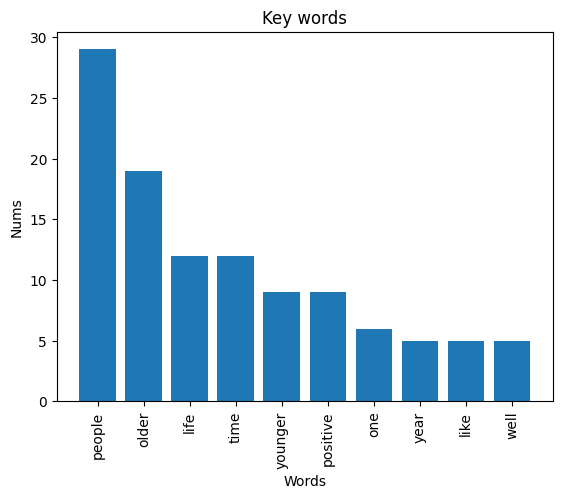

In [ ]:
import matplotlib.pyplot as plt

x = [data[0] for data in fdist1] # ['people', 'older', 'life' ...]
y = [data[1] for data in fdist1] # ['29', '19', '12' ...]

plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.xticks(fontsize=10, rotation=90)
plt.show()

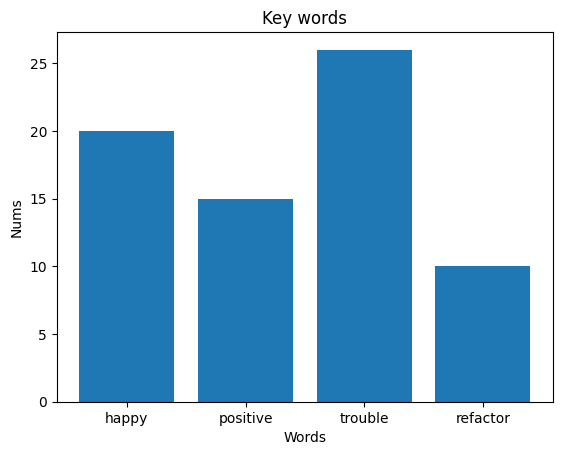

<Figure size 500x400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

x = ['happy', 'positive', 'trouble', 'refactor']
y = [20, 15, 26, 10]


plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.figure(figsize=(5,4))
plt.show()

2011pos Older people are happier.txt


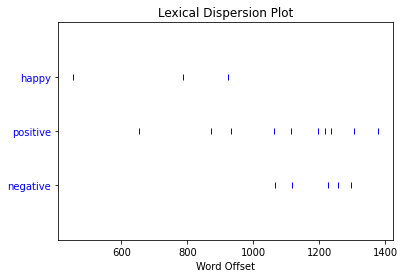

2012neg What doctors don't know about the drugs they prescribe.txt


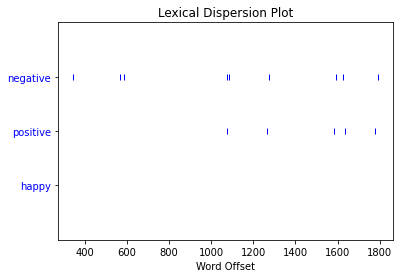

2016neu Asking for help is a strength, not a weakness.txt


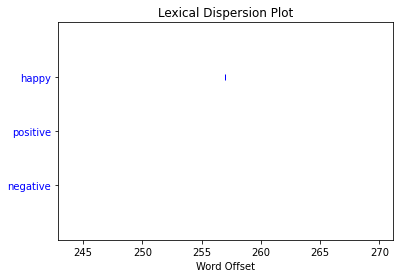

In [ ]:
findList = ['happy', 'positive', 'negative' ]

for fileid in books:
   myWords = wordlists.words(fileid)
   myText = nltk.text.Text(myWords)
   print(fileid)
   myText.dispersion_plot(findList)

In [ ]:
print(wordlists.fileids())

['2011pos Older people are happier.txt', "2012neg What doctors don't know about the drugs they prescribe.txt", '2016neu Asking for help is a strength, not a weakness.txt']


<Axes: xlabel='Samples', ylabel='Counts'>

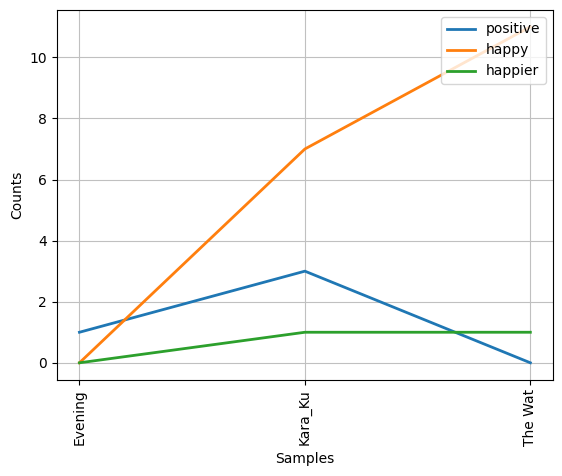

In [12]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:7]) # 表格下方顯示txt檔名前七個字
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)
           #List裡面請改成你要搜尋的字詞
           for target in ['happy', 'positive', 'negative', 'happier']
           if w.lower().startswith(target))
cfd.plot()

# 文字雲

### wordcloud 資料視覺化

[World Could Doc](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# doc: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

#讀取文本
file_text = open('/content/drive/MyDrive/Colab Notebooks/TED/2011pos Older people are happier.txt','r').read()


# background_color 背景顏色
# width 寬
# height 高
# margin 圖片邊緣
# max_font_size 設定文字中最大的大小是多少
# min_font_size
# max_words  文字雲顯示最大詞數
# font_path="/tmp/DFFT_C7.ttc", #設置字體

temp = WordCloud(
    background_color="white",
    width=2000,
    height=1000,
    margin= 10,
).generate(file_text)


plt.imshow(temp)
plt.axis("off")
plt.show()


# 練習

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/TED/2011pos Older people are happier.txt'

## 濾掉常用字詞或特定字詞

In [ ]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'not', 'whom', 'them', 'him', 'nor', 'again', 'a', 'who', 'my', "won't", "she'd", 'yourself', "they're", 'can', 'were', 'having', "didn't", 'its', "we're", 'here', 'himself', 'on', 'very', 'all', "i'd", 'up', 'these', "why's", 'under', 'hence', 'also', 'other', 'from', "aren't", "what's", 'what', 'and', 'however', "you'd", "they'll", 'so', 'be', 'been', 'during', "here's", 'r', 'theirs', 'this', 'has', "you've", "haven't", 'after', 'herself', "let's", 'how', 'some', 'she', 'have', "don't", 'me', "i'm", 'in', 'of', 'against', 'ourselves', 'doing', 'is', "shan't", 'their', 'hers', "mustn't", 'when', 'an', 'was', 'both', 'than', 'k', 'as', "couldn't", 'few', 'your', 'the', "you'll", 'else', 'since', 'by', 'our', 'www', "she'll", 'there', "how's", 'being', 'themselves', 'any', "can't", 'does', "they've", 'http', 'own', 'until', "they'd", 'too', 'out', "he'd", 'that', 'yourselves', 'like', 'his', 'because', 'it', 'get', 'at', "i'll", 'more', "we'd", 'otherwise', "isn't", 'if', 'further', '

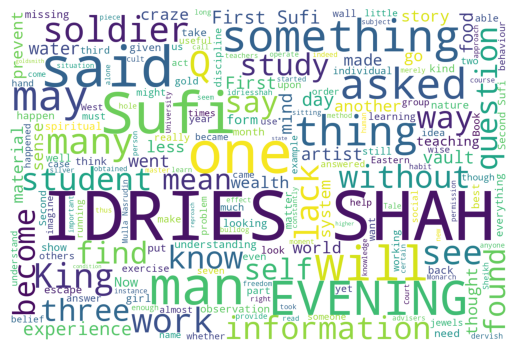

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#讀取文本
f = open('/content/drive/MyDrive/txt/Evenings with idries Shah.txt').read()

# stopwords 停用字詞
stop = ["people", "old people", "time", "life"] + list(STOPWORDS)

wordcloud = WordCloud(
    background_color="white", ##fff
    width=1500,
    height=1000,
    margin=2,
    stopwords=stop
).generate(f)


plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#練習濾掉stopword及指定字詞

In [ ]:
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/My Drive/Colab Notebooks/TED' # 請改成自己的路徑
wordlists = PlaintextCorpusReader(corpus_root, '.*')

books = wordlists.fileids()
print(books)

['2011pos Older people are happier.txt', "2012neg What doctors don't know about the drugs they prescribe.txt", '2016neu Asking for help is a strength, not a weakness.txt']


## 一次顯示多張文字雲圖

2011pos Older people are happier.txt


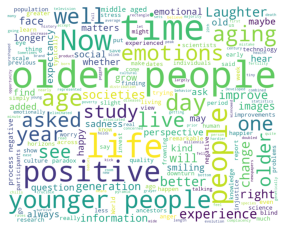

2012neg What doctors don't know about the drugs they prescribe.txt


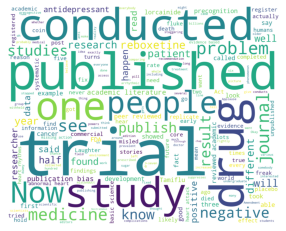

2016neu Asking for help is a strength, not a weakness.txt


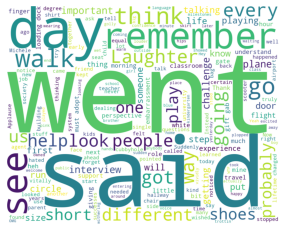

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stop = list(STOPWORDS)

for fileid in books:
  f = open('/content/drive/My Drive/Colab Notebooks/TED/'+fileid,'r').read()
  wordcloud = WordCloud(
      background_color="white",
      width=1500,
      height=1200,
      margin=2,
      stopwords=stop
  ).generate(f)

  plt.imshow(wordcloud)
  plt.axis("off")
  print(fileid)
  plt.show()

